In [1]:
import numpy as np
import pandas as pd
import glob, os, re, sys
import time
import copy

import artist_info_helper as aih

import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('mpl_style_Jeffreson.mplstyle')

In [2]:
def log_format(x, pos):
    return f'{int(x)}'

def percent_formatter(x, pos):
    return f'{x*100:.1f}\%'

# analysis for 10000 random artists

In [3]:
data = pd.read_csv("/n/holystore01/LABS/itc_lab/Users/sjeffreson/serch/artist-database/Spotify_artist_info_Mnth-Lstnrs.csv")
print(len(data['monthly_listeners']))

df = pd.Series(data['monthly_listeners'])

12926


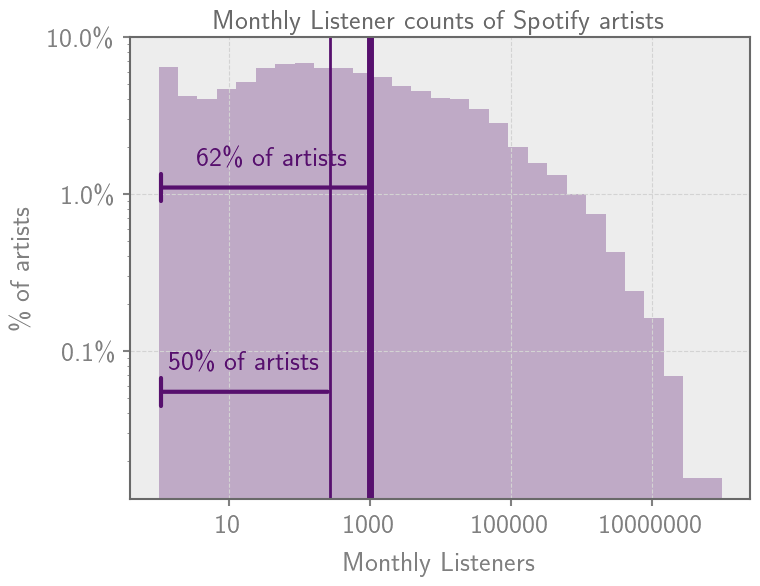

In [55]:
plt.figure(figsize=(8, 6))

# plot data
weights = np.ones_like(df) / len(data['monthly_listeners'])
plt.hist(df+1, bins=np.logspace(0., 8., 30), weights=weights,
         alpha=0.3, lw=2, log=True, color=plt.cm.inferno(0.25))

# median
plt.axvline(df.median(), color=plt.cm.inferno(0.25), lw=2)
plt.annotate(f'50\% of artists', xy=(df.median()-80, 0.001), xytext=(df.median()-80, 0.001),
             va='top', ha='right', color=plt.cm.inferno(0.25))
plt.annotate('',
    xy=(1., 0.00055),  # End point of the arrow (where the arrow points to)
    xytext=(df.median(), 0.00055),  # Start point of the text (and the arrow's tail)
    arrowprops=dict(arrowstyle="|-|,widthA=0.,widthB=0.5", facecolor=plt.cm.inferno(0.25), edgecolor=plt.cm.inferno(0.25), lw=3),
)

# percentile rank below 1000
plt.axvline(1000., color=plt.cm.inferno(0.25), lw=5)
percentage_below = ((df < 1000.).mean() * 100).round().astype(int)
plt.annotate(f'{percentage_below}\% of artists', xy=(500., 0.02), xytext=(500., 0.02),
             va='top', ha='right', color=plt.cm.inferno(0.25))
plt.annotate('',
    xy=(1., 0.011),  # End point of the arrow (where the arrow points to)
    xytext=(1000., 0.011),  # Start point of the text (and the arrow's tail)
    arrowprops=dict(arrowstyle="|-|,widthA=0.,widthB=0.5", facecolor=plt.cm.inferno(0.25), edgecolor=plt.cm.inferno(0.25), lw=3),
)

plt.xscale('log')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(percent_formatter))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(log_format))

plt.title(r'Monthly Listener counts of Spotify artists', color='dimgrey')
plt.xlabel(r'Monthly Listeners')
plt.ylabel(r'\% of artists')
plt.ylim([plt.gca().get_ylim()[0], 0.1])

plt.savefig("/n/holystore01/LABS/itc_lab/Users/sjeffreson/serch/figs/total_dstbn.png",
            format='png', bbox_inches='tight', dpi=96)
plt.show()

# separate out active artists

In [6]:
active_artists = aih.get_active_artists(data)
df_active = pd.Series(active_artists['monthly_listeners'])
print(len(active_artists['monthly_listeners']))

659


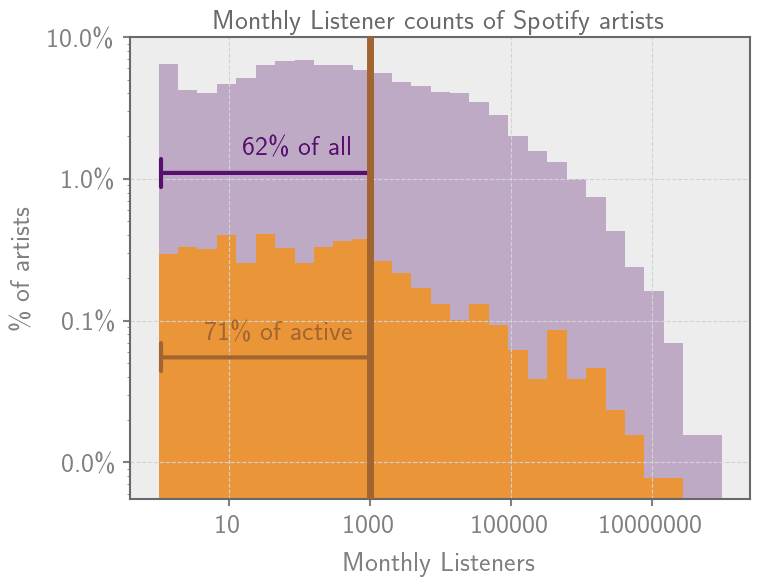

In [56]:
plt.figure(figsize=(8, 6))

# plot data
weights = np.ones_like(df) / len(data['monthly_listeners'])
plt.hist(df+1, bins=np.logspace(0., 8., 30), weights=weights,
         alpha=0.3, lw=2, log=True, color=plt.cm.inferno(0.25))
weights = np.ones_like(df_active) / len(data['monthly_listeners'])
plt.hist(df_active+1,
         bins=np.logspace(0., 8., 30), weights=weights,
         alpha=0.75, lw=2, log=True, color=plt.cm.inferno(0.75))

# percentile rank below 1000, all
percentage_below = ((df < 1000.).mean() * 100).round().astype(int)
plt.annotate(f'{percentage_below}\% of all', xy=(600., 0.02), xytext=(600., 0.02),
             va='top', ha='right', color=plt.cm.inferno(0.25))
plt.annotate('',
    xy=(1., 0.011),  # End point of the arrow (where the arrow points to)
    xytext=(1000., 0.011),  # Start point of the text (and the arrow's tail)
    arrowprops=dict(arrowstyle="|-|,widthA=0.,widthB=0.5", facecolor=plt.cm.inferno(0.25), edgecolor=plt.cm.inferno(0.25), lw=3),
)

# percentile rank below 1000, active
plt.axvline(1000., color="#A26531", lw=5, zorder=5)
percentage_below = ((df_active < 1000.).mean() * 100).round().astype(int)
plt.annotate(f'{percentage_below}\% of active', xy=(600., 0.001), xytext=(600., 0.001),
             va='top', ha='right', color="#A26531")
plt.annotate('',
    xy=(1., 0.00055),  # End point of the arrow (where the arrow points to)
    xytext=(1000., 0.00055),  # Start point of the text (and the arrow's tail)
    arrowprops=dict(arrowstyle="|-|,widthA=0.,widthB=0.5", facecolor="#A26531", edgecolor="#A26531", lw=3),
)

plt.xscale('log')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(percent_formatter))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(log_format))

plt.title(r'Monthly Listener counts of Spotify artists', color='dimgrey')
plt.xlabel(r'Monthly Listeners')
plt.ylabel(r'\% of artists')
plt.ylim([plt.gca().get_ylim()[0], 0.1])

plt.savefig("/n/holystore01/LABS/itc_lab/Users/sjeffreson/serch/figs/total_active_dstbn.png",
            format='png', bbox_inches='tight', dpi=96)

plt.show()

# separate out new active artists

In [25]:
new_active_artists = aih.get_new_active_artists(data)
print(len(new_active_artists['monthly_listeners']))

582


25.0
69.5
1058.0
904.75


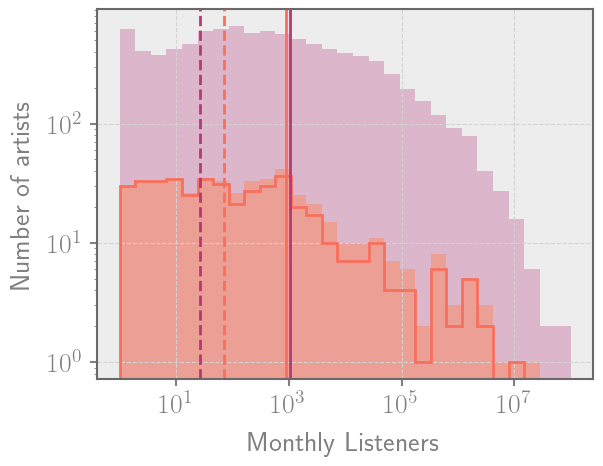

In [24]:
plt.hist(data['monthly_listeners']+1,
         bins=np.logspace(0., 8., 30),
         alpha=0.3, lw=2, log=True, color=plt.cm.magma(0.5))
plt.hist(active_artists['monthly_listeners']+1,
         bins=np.logspace(0., 8., 30),
         alpha=0.5, lw=2, log=True, color=plt.cm.magma(0.75))
plt.hist(new_active_artists['monthly_listeners']+1,
         bins=np.logspace(0., 8., 30),
         histtype='step', lw=2, log=True, color=plt.cm.magma(0.7))

plt.axvline(np.median(data['monthly_listeners']+1), color=plt.cm.magma(0.5), lw=2, ls='dashed')
plt.axvline(np.quantile(data['monthly_listeners']+1, 0.75), color=plt.cm.magma(0.5), lw=2, ls='-')
plt.axvline(np.median(new_active_artists['monthly_listeners']+1), color=plt.cm.magma(0.7), lw=2, ls='dashed')
plt.axvline(np.quantile(new_active_artists['monthly_listeners']+1, 0.75), color=plt.cm.magma(0.7), lw=2, ls='-')

print(np.median(data['monthly_listeners']))
print(np.median(new_active_artists['monthly_listeners']))
print(np.quantile(data['monthly_listeners'], 0.75))
print(np.quantile(new_active_artists['monthly_listeners'], 0.75))

plt.xscale('log')
plt.xlabel(r'Monthly Listeners')
plt.ylabel(r'Number of artists')
plt.show()

# WORK-IN-PROGRESS: artist info for artists featured on Spotify's editorial/curated/public playlists

In [26]:
from datetime import datetime
import pickle
DEFAULT_OUTPUT_DIR = "/n/holystore01/LABS/itc_lab/Users/sjeffreson/serch/artist-database/"
with open(DEFAULT_OUTPUT_DIR + "artist_ids_last_24hrs_2024-03-21_monthly_listeners.pkl", "rb") as f:
    featured_artists = pickle.load(f)

1259.16


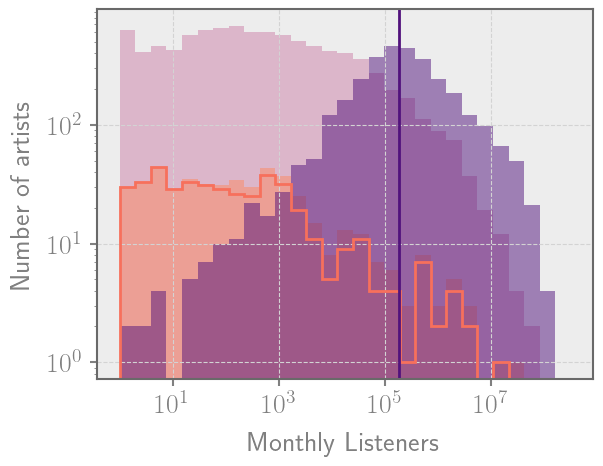

In [27]:
plt.hist(data['monthly_listeners']+1,
         bins=np.logspace(0., 8.5, 30),
         alpha=0.3, lw=2, log=True, color=plt.cm.magma(0.5))
plt.hist(active_artists['monthly_listeners']+1,
         bins=np.logspace(0., 8.5, 30),
         alpha=0.5, lw=2, log=True, color=plt.cm.magma(0.75))
plt.hist(new_active_artists['monthly_listeners']+1,
         bins=np.logspace(0., 8.5, 30),
         histtype='step', lw=2, log=True, color=plt.cm.magma(0.7))
plt.hist(list(featured_artists.values()),
         bins=np.logspace(0., 8.5, 30),
         alpha=0.5, lw=2, log=True, color=plt.cm.magma(0.25))
plt.axvline(np.median(list(featured_artists.values())), color=plt.cm.magma(0.25), lw=2)
print(np.quantile(list(featured_artists.values()), 0.04))

plt.xscale('log')
plt.xlabel(r'Monthly Listeners')
plt.ylabel(r'Number of artists')
plt.show()

1259.16


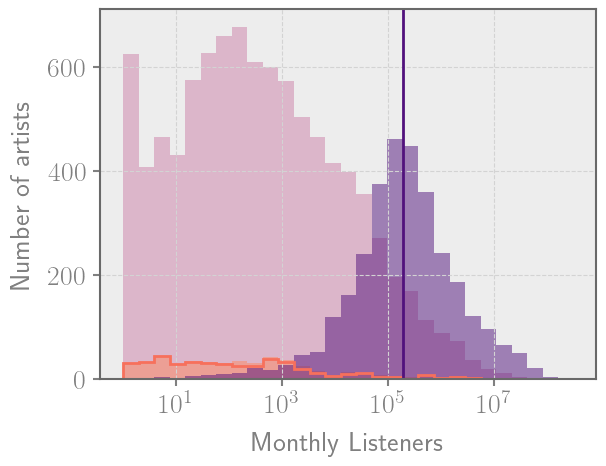

In [28]:
plt.hist(data['monthly_listeners']+1,
         bins=np.logspace(0., 8.5, 30),
         alpha=0.3, lw=2, color=plt.cm.magma(0.5))
plt.hist(active_artists['monthly_listeners']+1,
         bins=np.logspace(0., 8.5, 30),
         alpha=0.5, lw=2, color=plt.cm.magma(0.75))
plt.hist(new_active_artists['monthly_listeners']+1,
         bins=np.logspace(0., 8.5, 30),
         histtype='step', lw=2, color=plt.cm.magma(0.7))
plt.hist(list(featured_artists.values()),
         bins=np.logspace(0., 8.5, 30),
         alpha=0.5, lw=2, color=plt.cm.magma(0.25))
plt.axvline(np.median(list(featured_artists.values())), color=plt.cm.magma(0.25), lw=2)
print(np.quantile(list(featured_artists.values()), 0.04))

plt.xscale('log')
plt.xlabel(r'Monthly Listeners')
plt.ylabel(r'Number of artists')
plt.show()